In [1]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
dir_path='prepared_dataset'

#training dataset
x_train=np.load(os.path.join(dir_path,'train_images.npy'))
y_train=np.load(os.path.join(dir_path,'train_labels.npy'))

#cross validation dataset
x_cv=np.load(os.path.join(dir_path,'cross_validation_images.npy'))
y_cv=np.load(os.path.join(dir_path,'cross_validation_labels.npy'))

#test dataset
x_test=np.load(os.path.join(dir_path,'test_images.npy'))
y_test=np.load(os.path.join(dir_path,'test_labels.npy'))

y_train=np.expand_dims(y_train,axis=1)
y_cv=np.expand_dims(y_cv,axis=1)
y_test=np.expand_dims(y_test,axis=1)

features=278*278*3

x_train_reshaped=x_train.reshape((445,features))
x_cv_reshaped=x_cv.reshape((56,features))
x_test_reshaped=x_test.reshape((56,features))

print("After reshaping : ")
print(f"shape of X_train,y_train = {x_train_reshaped.shape},{y_train.shape} \n"+
      f"shape of X_cv,y_cv = {x_cv_reshaped.shape},{y_cv.shape} \n"+
      f"shape of X_test,y_test = {x_test_reshaped.shape},{y_test.shape}")

After reshaping : 
shape of X_train,y_train = (445, 231852),(445, 1) 
shape of X_cv,y_cv = (56, 231852),(56, 1) 
shape of X_test,y_test = (56, 231852),(56, 1)


In [3]:
scaler=StandardScaler()
x_train_reshaped_scaled=scaler.fit_transform(x_train_reshaped)
x_cv_reshaped_scaled=scaler.transform(x_cv_reshaped)

In [21]:
model = Sequential([
        tf.keras.Input((231852,)),
        Dense(units=960, activation='relu', name='layer_1'),
        Dense(units=730, activation='relu', name='layer_2'),
        Dense(units=615, activation='relu', name='layer_3'),
        Dense(units=520,activation='relu',name='layer_4'),
        Dense(units=410,activation='relu',name='layer_5'),
        Dense(units=240,activation='relu',name='layer_6'),
        Dense(units=120,activation='relu',name='layer_7'),
        Dense(units=60,activation='relu',name='layer_8'),
        Dense(units=2, activation='linear', name='layer_9')
    ], name='model')

In [22]:
model.compile(optimizer=Adam(0.01),loss=SparseCategoricalCrossentropy(from_logits=True))

history=model.fit(x_train_reshaped_scaled,y_train,epochs=20)

Epoch 1/20
14/14 [==============================] - 34s 2s/step - loss: 2277.4255
Epoch 2/20
14/14 [==============================] - 29s 2s/step - loss: 17.4983
Epoch 3/20
14/14 [==============================] - 30s 2s/step - loss: 3.0542
Epoch 4/20
14/14 [==============================] - 29s 2s/step - loss: 1.1162
Epoch 5/20
14/14 [==============================] - 29s 2s/step - loss: 1.1696
Epoch 6/20
14/14 [==============================] - 31s 2s/step - loss: 0.8392
Epoch 7/20
14/14 [==============================] - 31s 2s/step - loss: 0.7324
Epoch 8/20
14/14 [==============================] - 30s 2s/step - loss: 0.6842
Epoch 9/20
14/14 [==============================] - 30s 2s/step - loss: 0.7161
Epoch 10/20
14/14 [==============================] - 30s 2s/step - loss: 0.6863
Epoch 11/20
14/14 [==============================] - 30s 2s/step - loss: 0.7030
Epoch 12/20
14/14 [==============================] - 30s 2s/step - loss: 0.6938
Epoch 13/20
14/14 [==========================

In [23]:
logits_train = model.predict(x_train_reshaped_scaled)

yhat_train = tf.nn.softmax(logits_train, axis=1).numpy()
prob_train = np.argmax(yhat_train, axis=1)
J_train = np.mean(prob_train != y_train)
# J_cv
logits_cv = model.predict(x_cv_reshaped_scaled)
yhat_cv = tf.nn.softmax(logits_cv, axis=1).numpy()
prob_cv = np.argmax(yhat_cv, axis=1)
J_cv = np.mean(prob_cv != y_cv)


print("RESULTS ======>")
print(f"J_train = {J_train}  " +
          f"J_cv = {J_cv}  ")

2/2 [==============================] - 0s 161ms/step
RESULTS ======>
J_train = 0.4956343895972731  J_cv = 0.5089285714285714  


2/2 [==============================] - 0s 170ms/step


<Axes: >

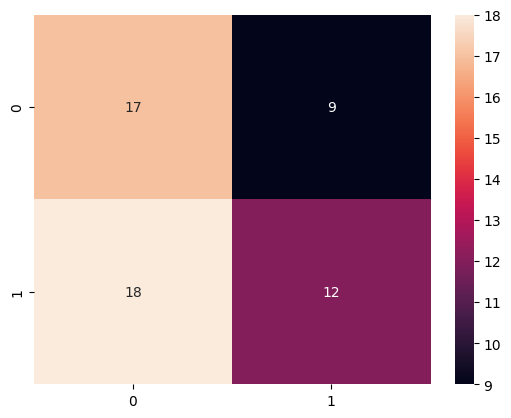

In [24]:
logits_cv = model.predict(x_cv_reshaped_scaled)
yhat_cv = tf.nn.softmax(logits_cv, axis=1).numpy()
prob_cv = np.argmax(yhat_cv, axis=1)
J_cv = np.mean(prob_cv != y_cv)
sns.heatmap(confusion_matrix(y_cv,prob_cv),annot=True)